In [1]:
# Importing the necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Wine Dataset and display it
data = pd.read_csv(r'C:\Users\sreeh\DSA\Data-sets\Wine_clust.csv')

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = data

# Preprocessing: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = data.columns)

### K-Means Clustering

In [4]:
# Checking the WCSS values for different values of k to determine the best k
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42, n_init =10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

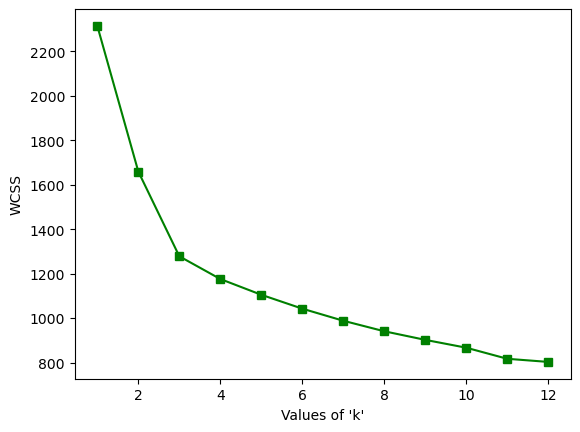

In [5]:
# Plotting the graph for visual inspection (Elbow Method)
plt.plot(range(1,13),wcss, 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [6]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)

# Retrieve the cluster assignments
kmeans_labels = kmeans.labels_

In [7]:
# Display the distribution of clusters
label_counts = pd.Series(kmeans_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,51
1,1,62
2,2,65


In [8]:
# Display the silhouette score
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(X_scaled,y_kmeans)
print("The Silhouette Score for K-means with 3 clusters is :",sil_kmeans)

The Silhouette Score for K-means with 3 clusters is : 0.2848589191898987


In [9]:
kmeans_clustered_data = X.copy()

In [10]:
kmeans_clustered_data['Cluster'] = y_kmeans

In [11]:
# Display the data with clusters added
kmeans_clustered_data.sample(n=5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,2
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,2
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,1
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,2


In [12]:
# Applying PCA for dimensionality reduction to plot a graph
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X_scaled),columns=['PCA1','PCA2'])
 
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [13]:
# Reducing the centers
centers=pca.transform(kmeans.cluster_centers_)

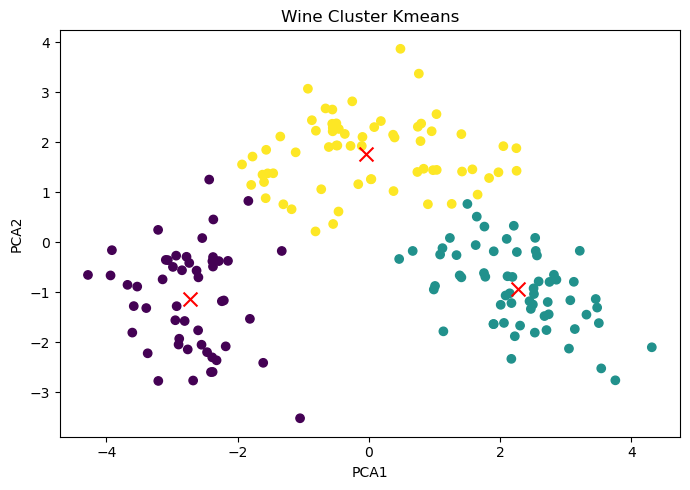

In [14]:
# Plotting a scatter plot to show the cluser distribution
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans_labels)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster Kmeans')
plt.tight_layout()

### Agglomerative Heirarchial Clustering

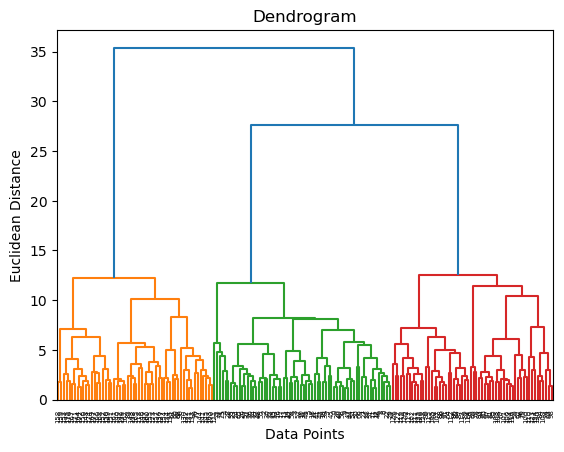

In [15]:
# Plotting a dendrogam to find out the optimum number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [16]:
# Using 3 as the number of clusters
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(X_scaled)

# Retrieve the cluster assignments
ahc_labels = ahc.labels_

In [17]:
# Display the distribution of clusters
label_counts = pd.Series(ahc_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,58
1,1,56
2,2,64


In [18]:
# Display the silhouette score
sil_ahc = silhouette_score(X_scaled,y_ahc)
print("The Silhouette Score for Agglomerative Heirarchichal Clustering with 3 clusters is :",sil_ahc)

The Silhouette Score for Agglomerative Heirarchichal Clustering with 3 clusters is : 0.2774439826952265


In [19]:
ah_clustered_data = X.copy()

In [20]:
ah_clustered_data['Cluster'] = y_ahc

In [21]:
# Display the data with clusters added
ah_clustered_data.sample(n=5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
156,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,1
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,1
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190,2


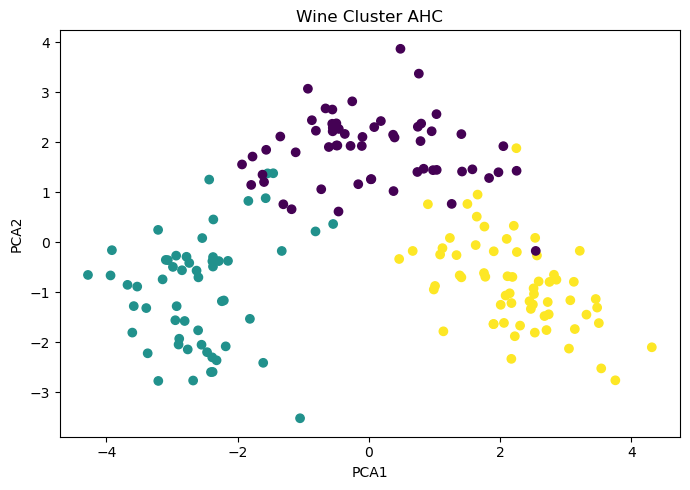

In [22]:
# Plot a scatter plot
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=ahc_labels)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster AHC')
plt.tight_layout()

### DBCSAN

In [23]:
# Preprocessing for DBSCAN
X1 = data
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,10))
X1_scaled = min_max.fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns = data.columns)

In [24]:
# Creating a model
dbscan = DBSCAN(eps= 6.2, min_samples=30)
y_dbscan = dbscan.fit_predict(X1_scaled)

In [25]:
# Retrieve the cluster assignments
dbscan_labels = dbscan.labels_

In [26]:
# Display the distribution of clusters
label_counts = pd.Series(dbscan_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,-1,21
1,0,110
2,1,47


In [27]:
core_samples = dbscan.core_sample_indices_
print("Number of Core Samples:")
print(len(core_samples))

Number of Core Samples:
63


In [28]:
# Display the silhouette score
sil_dbscan = silhouette_score(X1_scaled,y_dbscan)
print("The Silhouette Score for DBSCAN with 2 clusters is :",sil_dbscan)

The Silhouette Score for DBSCAN with 2 clusters is : 0.24823086977955774


In [29]:
dbscan_clustered_data = X1.copy()
dbscan_clustered_data['Cluster'] = y_dbscan

In [30]:
# Display the data with clusters added
dbscan_clustered_data.sample(n=5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,1
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,0
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,1
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,0
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570,1


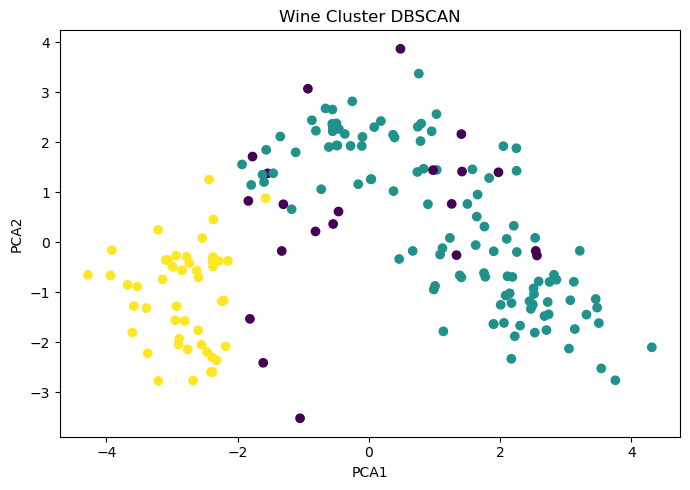

In [31]:
# Plot a scatter plot
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=dbscan_labels)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster DBSCAN')
plt.tight_layout()